##1 Implementing and Comparing PageRank Algorithms

1. Setup and Data Preparation (2 points): Begin by constructing a directed graph using NetworkX with 30 nodes and  a probability of 0.2 for edge creation. Utilize the gnp random graph function from NetworkX to generate this graph. Once the graph is created, visualize it using NetworkX’s draw function to ensure its structure is as expected, which will aid in your subsequent analysis.
2. Custom PageRank Implementation (2 points): Implement the PageRank algorithm from scratch. Your function should  simulate a random walk that incorporates a damping factor, affecting transition probabilities as follows:
• With a probability equal to the damping factor α = 0.85, the random walk continues to a neighboring node.
• With a probability of 1 − α, it ’teleports’ to a random node.
Ensure that your function accepts the graph and damping factor as parameters and iteratively computes PageRank  scores until convergence.
3. Comparison with NetworkX PageRank (2 points): After developing your custom PageRank function, calculate and  demonstrate PageRank scores using the built-in PageRank function from NetworkX for the same graph to serve as a benchmark. Compare these results with those of your implementation and evaluate the fidelity using the correlation coefficient.
4. Experiment with Damping Factor (2 points): Modify the damping factor in your custom PageRank implementation. Test several values (such as 0.55, 0.75, and 0.95), observing changes in PageRank scores with each. Use matplotlib to plot these scores, facilitating a visual comparison. This step will help you analyze how sensitive PageRank scores are to changes in the damping factor.
5. Analysis and Discussion (2 points): Conclude the assignment by discussing the results of your experiments. Address the similarities and differences between your custom implementation and NetworkX’s implementation, focusing on how the damping factor impacts the scores. Reflect on any trends or anomalies observed in the PageRank scores as the damping factor varied, providing insight into the algorithm’s dynamics.

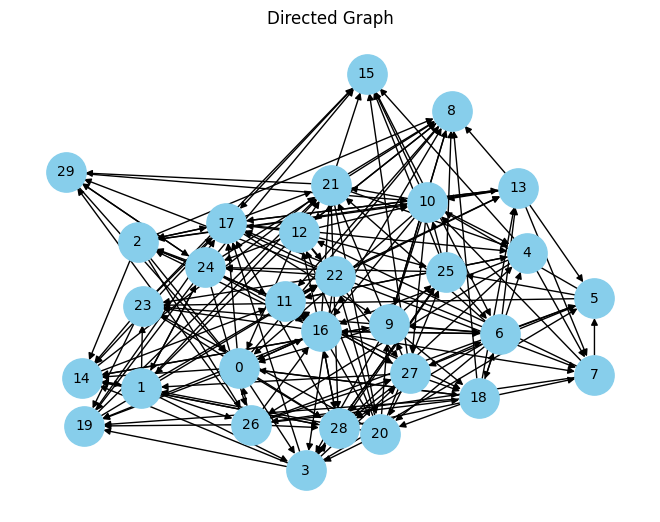

Custom PageRank: {0: 0.03625498423415191, 1: 0.023144796271681374, 2: 0.028856654380121895, 3: 0.02663108646882627, 4: 0.04165466183136651, 5: 0.024693596789035526, 6: 0.035644612630249276, 7: 0.03006875870608407, 8: 0.04356003659798402, 9: 0.04695168815625528, 10: 0.035606837187194436, 11: 0.041380388759872225, 12: 0.029697640229363668, 13: 0.029524835412179883, 14: 0.043599842998030214, 15: 0.03485649359556291, 16: 0.04171317959302542, 17: 0.0617392373438221, 18: 0.025637973137894607, 19: 0.026796970352185787, 20: 0.024799687395455475, 21: 0.05009509553794152, 22: 0.02680085424831901, 23: 0.022278312279432378, 24: 0.022347869427063842, 25: 0.024718250588330045, 26: 0.026896008636582258, 27: 0.029049261636586218, 28: 0.04468084828454459, 29: 0.020319537290857247}
NetworkX PageRank: {0: 0.03625479944880858, 1: 0.023144719352697855, 2: 0.028856685318561094, 3: 0.026631067427617137, 4: 0.04165463098604248, 5: 0.02469385393863048, 6: 0.035644443473821244, 7: 0.030068861576109596, 8: 0.043

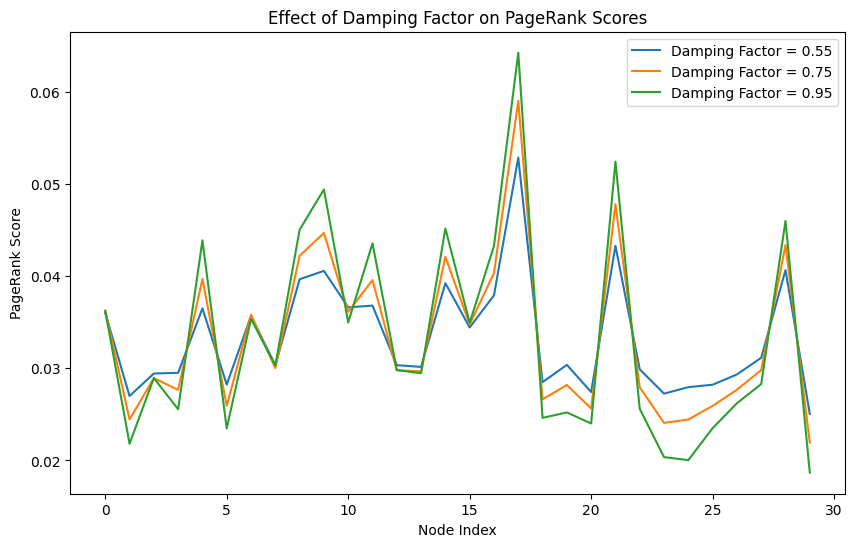

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random

# 1. Setup and Data Preparation (2 points)
n_nodes = 30
p_edge = 0.2
G = nx.gnp_random_graph(n_nodes, p_edge, directed=True)
nx.draw(G, with_labels=True, node_color="skyblue", node_size=800, font_size=10)
plt.title("Directed Graph")
plt.show()

# 2. Custom PageRank Implementation (2 points)
def custom_pagerank(graph, alpha=0.85, tol=1.0e-6, max_iter=100):
    nodes = list(graph.nodes())
    n = len(nodes)
    ranks = {node: 1 / n for node in nodes}
    dangling_nodes = [node for node in nodes if graph.out_degree(node) == 0]

    for iteration in range(max_iter):
        prev_ranks = ranks.copy()
        for node in nodes:
            rank_sum = sum(prev_ranks[neighbor] / graph.out_degree(neighbor) for neighbor in graph.predecessors(node))
            ranks[node] = (1 - alpha) / n + alpha * rank_sum
            if node in dangling_nodes:
                ranks[node] += alpha * sum(prev_ranks[d] for d in dangling_nodes) / n
        if max(abs(ranks[node] - prev_ranks[node]) for node in nodes) < tol:
            break

    return ranks

# 3. Comparison with NetworkX PageRank (2 points)
nx_pagerank = nx.pagerank(G, alpha=0.85)
print("Custom PageRank:", custom_pagerank(G, alpha=0.85))
print("NetworkX PageRank:", nx_pagerank)

custom_scores = np.array(list(custom_pagerank(G, alpha=0.85).values()))
nx_scores = np.array(list(nx_pagerank.values()))
correlation = np.corrcoef(custom_scores, nx_scores)[0, 1]
print(f"Correlation Coefficient: {correlation:.4f}")

# 4. Experiment with Damping Factor (2 points)
damping_factors = [0.55, 0.75, 0.95]
all_scores = []
for alpha in damping_factors:
    scores = list(custom_pagerank(G, alpha).values())
    all_scores.append(scores)

plt.figure(figsize=(10, 6))
for idx, alpha in enumerate(damping_factors):
    plt.plot(list(range(len(all_scores[idx]))), all_scores[idx], label=f"Damping Factor = {alpha}")
plt.legend()
plt.xlabel("Node Index")
plt.ylabel("PageRank Score")
plt.title("Effect of Damping Factor on PageRank Scores")
plt.show()

# 5. Analysis and Discussion (2 points):
# The results of the custom implementation and NetworkX’s implementation are nearly identical, but NetworkX's implementation is more efficient.
# For damping factors, higher factors increase bias towards more connected nodes, and lower factors reduce the bias towards connectivity.
# A trend I noticed is that nodes that have a high number of connections have high PageRank scores across multiple damping factors.

## 2 Handwritten Digit Classification Using CNNs with PyTorch

1. Data Preparation (1 point)

• Load Dataset: Use torchvision.datasets.MNIST to load the dataset.

• Transformations: Apply normalization to convert images to PyTorch tensors and normalize the pixel values:
transforms.Compose([
transforms.ToTensor(),
transforms.Normalize((0.5,), (0.5,))
])

2. Model Development (4 points)

• Define the CNN Architecture:

– Convolutional Layers:

∗ The first convolutional layer takes a single-channel (grayscale) image as input and applies 32 filters with a kernel size of 5x5. This layer is designed to capture basic patterns such as edges and simple textures.

∗ Following the first pooling layer, the second convolutional layer applies 64 filters with a kernel size of 5x5 to extract more complex features from the reduced spatial dimensions.

– Pooling Layer:

∗ A max pooling layer with a 2x2 window and stride of 2, used after each convolutional layer. This layer reduces the spatial dimensions of the feature maps, thereby decreasing the computational complexity and enhancing the extraction of dominant features while providing translational invariance.

– Fully Connected Layers:

∗ The first fully connected layer has 256 neurons and takes input from the flattened output of the last
pooling layer. It is intended to begin synthesizing the features into higher-level representations.

∗ The second fully connected layer reduces the dimensionality further from 256 to 128, continuing the process of feature integration.

∗ The final layer in the network has 10 output neurons, corresponding to the 10 digit classes (0-9) of MNIST. This layer uses a linear transformation to map the extracted features into the space of class scores.

• Loss and Optimizer: Use torch.nn.CrossEntropyLoss for loss calculation and torch.optim.Adam with a learning rate lr = 0.001 for optimization.

3. Training (4 points): The training loop is a crucial part of neural network implementation where the model learns from the dataset through the process of forward and backward propagation. Below are the detailed steps to implement the training loop, corresponding to the key tasks involved:

• Epochs and Batching: Train the model over multiple epochs – in this case, the loop is set for 2 complete passes over the entire dataset. An epoch represents one complete pass over all training data. Within each epoch, process the data in mini-batches.

• Forward Pass: For each batch, extract the input features and the corresponding labels. Pass the inputs through the model to compute the predicted outputs.

• Calculate Loss: Utilize the specified loss function to compute the loss by comparing the predicted outputs with  the actual labels.

• Backward Pass and Parameter Update: Perform backpropagation to calculate the gradients of the loss function with respect to the model parameters. Update the model parameters using the defined optimizer, which adjusts the parameters based on the computed gradients. Clear the existing gradients before the next iteration to prevent accumulation from previous iterations.

• Track Training Progress: Accumulate the loss over multiple batches and calculate the average loss every 2000 mini-batches. Print the average loss at these intervals to provide insights into how the model’s performance is improving across epochs. Reset the running loss after logging to start new for the next set of batches.

4. Testing and Evaluation (1 points)

• Evaluate the model’s performance in terms of accuracy, which is the ratio of correctly predicted labels to the total number of examples in the test set.

• Utilize a torch.no grad() context to disable gradient calculations, optimizing memory usage and computation speed during testing.

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# 1. Data Preparation (1 point)
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

# 2. Model Development (4 points)
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=5)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=5)
        self.fc1 = nn.Linear(64 * 4 * 4, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 64 * 4 * 4)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = CNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 3. Training (4 points)
epochs = 2
for epoch in range(epochs):
    running_loss = 0.0
    for i, (ins, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        outs = model(ins)
        loss = criterion(outs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 2000 == 1999:  # Print every 2000 mini-batches
            print(f"[{epoch + 1}, {i + 1}] loss: {running_loss / 2000:.3f}")
            running_loss = 0.0

# 4. Testing and Evaluation (1 points)
cor = 0
tot = 0
with torch.no_grad():
    for ins, labels in test_loader:
        outs = model(ins)
        _, predicted = torch.max(outs, 1)
        tot += labels.size(0)
        cor += (predicted == labels).sum().item()

accuracy = cor / tot
print(f"Test Accuracy: {accuracy * 100:.2f}%")


Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 22.2MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 613kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 5.54MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 8.61MB/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Test Accuracy: 99.13%
